# Schizophrenia Prediction Model
## Introduction

This notebook demonstrates a machine learning model for predicting schizophrenia. The dataset used contains various features related to patient data, and the goal is to classify whether a patient is likely to have schizophrenia. We will preprocess the data, train a model, and evaluate its performance using appropriate metrics.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


## Reading Data and getting a general idea about the columns

In [88]:
data = pd.read_csv("schizophrenia_dataset.csv")

print(data.shape)

print(data.isnull().sum().sum())

print(data.describe())

print(data.duplicated().sum())

for column in data.columns:
    print(f"\n{data[column].value_counts()}")

for column in data.columns:
    print(f"Unique values in {column}: {data[column].unique()}")

(10000, 20)
0
        Patient_id           Age        Gender  Education Level  \
count  10000.00000  10000.000000  10000.000000     10000.000000   
mean    5000.50000     48.867700      0.502600         3.042600   
std     2886.89568     18.215054      0.500018         1.423021   
min        1.00000     18.000000      0.000000         1.000000   
25%     2500.75000     33.000000      0.000000         2.000000   
50%     5000.50000     49.000000      1.000000         3.000000   
75%     7500.25000     65.000000      1.000000         4.000000   
max    10000.00000     80.000000      1.000000         5.000000   

       Marital Status    Occupation  Income Level   Living Area     Diagnosis  \
count    10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean         1.518200      1.510600      0.996900      0.499400      0.288700   
std          1.117315      1.114097      0.817531      0.500025      0.453181   
min          0.000000      0.000000      0.000000      0.0

### Correlation Heat Map

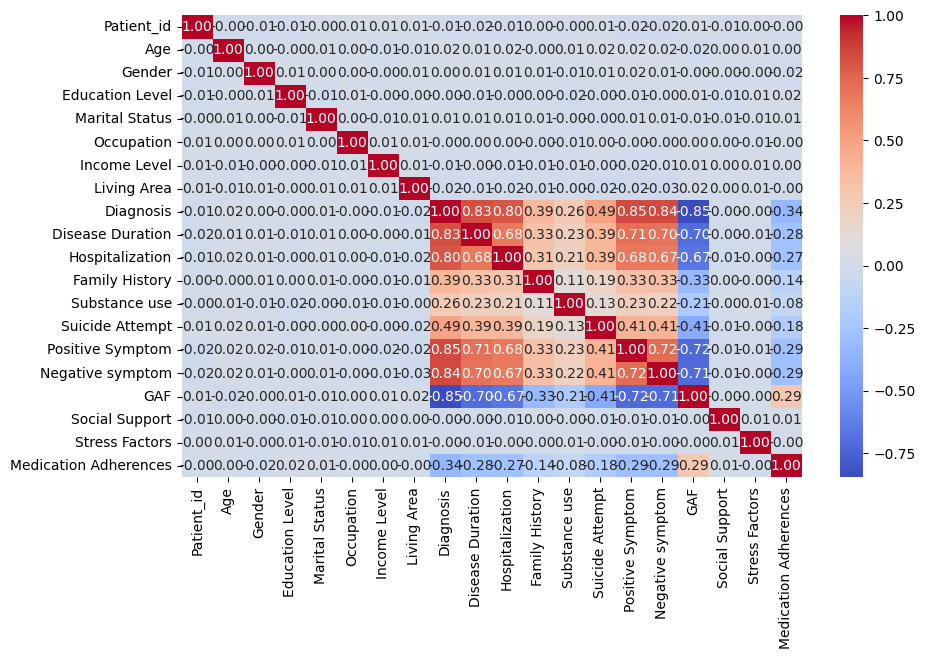

In [89]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

Class Imbalances

In [90]:
print("\nTarget value distribution:")
print(data["Diagnosis"].value_counts(normalize=True)) 


Target value distribution:
Diagnosis
0    0.7113
1    0.2887
Name: proportion, dtype: float64


Dropped ID (not a feature)

In [91]:
data = data.drop(columns=["Patient_id"])


Splitting Features and target

In [92]:
X = data.drop(columns=["Diagnosis"])
y = data["Diagnosis"]

# Add slight noise to make synthetic data more realistic
X_noisy = X.copy()
noise_factor = 0.01
for col in X_noisy.select_dtypes(include='number').columns:
    X_noisy[col] += noise_factor * np.random.normal(size=X_noisy.shape[0])

# add noise to Y
y_noisy = y.copy()
flip_indices = np.random.choice(y.index, size=int(0.05 * len(y)), replace=False)
y_noisy[flip_indices] = 1 - y_noisy[flip_indices]


X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42, stratify=y)

## Random Forest Classifier
* Train Model
* Make Prediction
* Evaluate Model

### Training

In [93]:
model = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

### Feature Importance

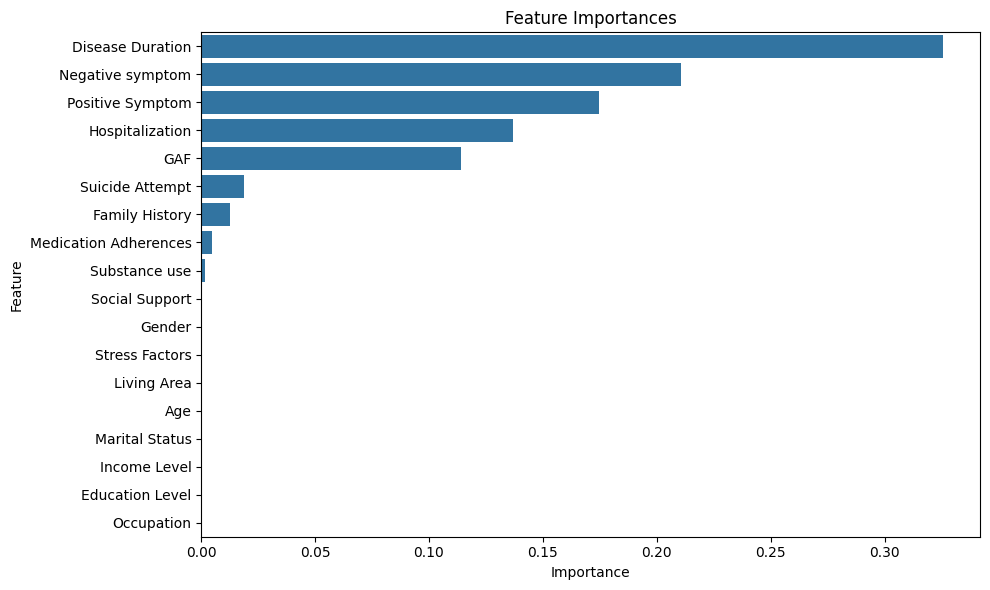

In [94]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [96]:
#Drop Column
data = data.drop(columns=["Age", "Stress Factors", "Income Level", "Social Support", "Marital Status", "Gender", "Living Area", "Education Level", "Occupation"])

### Predicting

In [ ]:
y_pred = model.predict(X_test)

### Evaluating

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

cv_scores = cross_val_score(model, X_noisy, y, cv=5, scoring='accuracy')
print(f"\nCross-validated Accuracy (5-fold): {cv_scores.mean():.4f}")

print("Train/Test Accuracy:", accuracy)
print("Cross-Validation Accuracy:", cv_scores.mean())

Model Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1423
           1       1.00      1.00      1.00       577

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Cross-validated Accuracy (5-fold): 1.0000
Train/Test Accuracy: 1.0
Cross-Validation Accuracy: 1.0


Checking for Data Leakage

In [ ]:
correlations = data.corr()
print(correlations["Diagnosis"].sort_values(ascending=False))

Diagnosis                1.000000
Positive Symptom         0.846972
Negative symptom         0.843931
Disease Duration         0.831047
Hospitalization          0.800552
Suicide Attempt          0.488795
Family History           0.390557
Substance use            0.264959
Age                      0.019215
Marital Status           0.010262
Gender                   0.004411
Occupation              -0.000416
Education Level         -0.001394
Stress Factors          -0.001687
Social Support          -0.003621
Income Level            -0.010541
Living Area             -0.023730
Medication Adherences   -0.340134
GAF                     -0.847212
Name: Diagnosis, dtype: float64


### Confusion Matrix

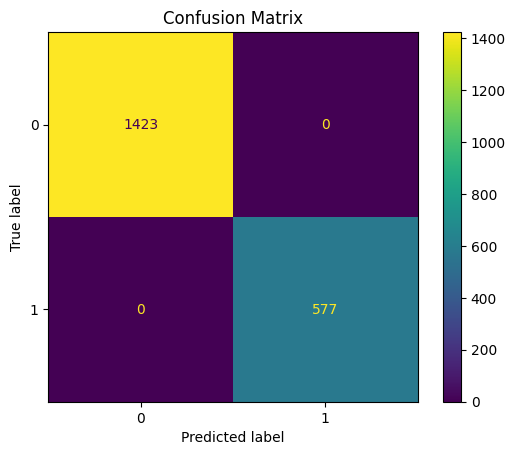

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

## Testing a simpler Model (Avoid Overfitting)

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("\n--- Logistic Regression Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_lr)) 


--- Logistic Regression Results ---
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1423
           1       1.00      1.00      1.00       577

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



### Learning Curve

Random Forest


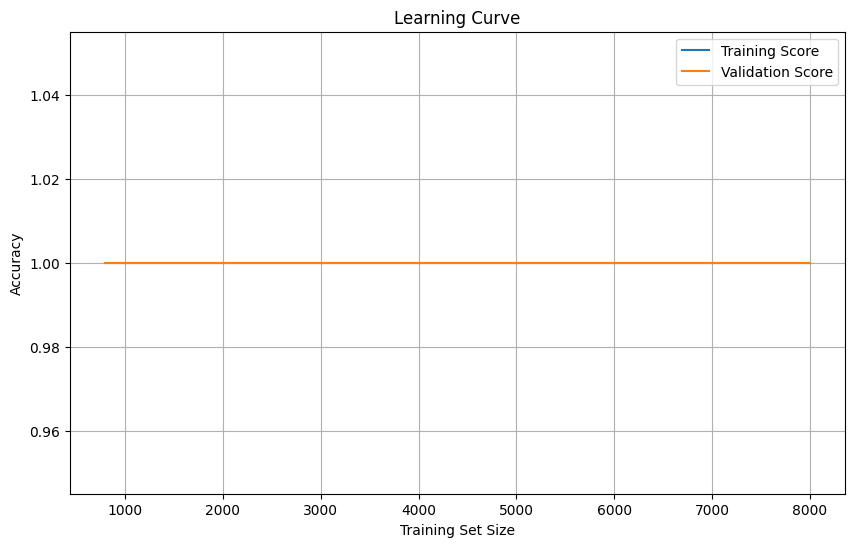

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_noisy, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()

Linear Regression

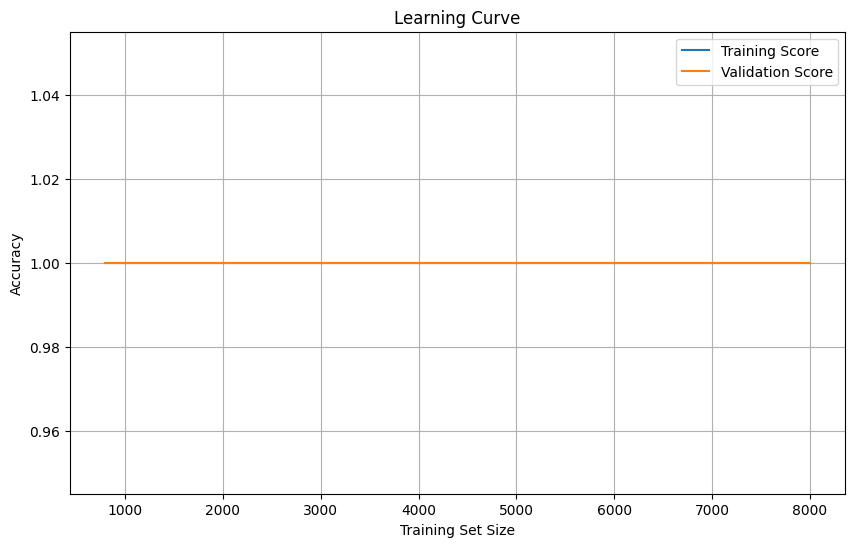

In [ ]:
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(
    model_lr, X_noisy, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean_lr = np.mean(train_scores, axis=1)
test_mean_lr = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_lr, train_mean_lr, label="Training Score")
plt.plot(train_sizes_lr, test_mean_lr, label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()
